---
title: "Probability Theory & Random Variables: Sentiment Analysis"
author: "Julia Chen"
date: "2023-11-29"
categories: []
image: "image.png"
---

In this blog post, we will use Naive Bayes to demonstrate probability theory & random variables, as well as apply it to a sentiment analysis dataset. Naive Bayes uses Bayes' rule to calculate probabilities and to predict classifications. There are multiple different types of Naive Bayes algorithms and classifiers--in this post we will be using Gaussian Naive Bayes and Multinomial Naive Bayes. 

## Preparing the data

First, let's read in our dataset from the csv file:

In [17]:
import pandas as pd

dataset = pd.read_csv("Reddit_Data.csv")

Here's a preview of the contents of the current dataset

In [18]:
dataset

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


It contains two columns, clean_comment and category [1 for positive, 0 for neutral, -1 for negative sentiment]

In [19]:
dataset.columns

Index(['clean_comment', 'category'], dtype='object')

Here is information on the dataframe including the datatypes

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


Let's check if there are null values

In [21]:
dataset.isnull().sum()

clean_comment    100
category           0
dtype: int64

Since there are null values, let's remove them from the dataset

In [22]:
dataset = dataset.dropna()

Here is our updated dataset

In [23]:
dataset

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37149 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 870.7+ KB


## Applying Naive Bayes

First, let's separate the x and y columns (clean comments are our x values and the sentiments/categories are our y values):

In [25]:
from sklearn.model_selection import train_test_split

x_values = dataset['clean_comment']
y_values = dataset['category']

Then, we separate the dataset into training and testing sets using train_test_split

In [26]:
x_train, x_test, y_train, y_test= train_test_split(x_values,y_values, shuffle=True, test_size=.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(29719,)
(29719,)
(7430,)
(7430,)


Now, let's import and create CountVectorizer and TfidfTransformer instances to tokenize our text values

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(analyzer="word")
tfidf_transformer = TfidfTransformer()

We can apply the fit_transform/transform functions to the training/testing x values

In [28]:
import numpy as np

x_train = vectorizer.fit_transform(x_train)
x_train = tfidf_transformer.fit_transform(X=x_train)
x_test = vectorizer.transform(x_test)
x_test = tfidf_transformer.transform(X=x_test)

Now, let's apply Gaussian Naive Bayes to the dataset. We can use GaussianNB from sklearn to classify our data.

In [29]:
from sklearn.naive_bayes import GaussianNB

x_train = x_train.toarray()
x_test = x_test.toarray()

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

We can use the GaussianNB classifier to predict the y values from our test x values:

In [30]:
y_pred = gnb.predict(x_test)

Using the sklearn metrics accuracy_score function, let's print our accuracy score

In [31]:
from sklearn.metrics import accuracy_score

print('Accuracy score: ', (accuracy_score(y_test, y_pred)))

Accuracy score:  0.5281292059219381


Now, let's try applying Multinomial Naive Bayes, which is commonly used in text classification

In [32]:
from sklearn.naive_bayes import MultinomialNB

multinomialNB = MultinomialNB(force_alpha=True)
multinomialNB.fit(x_train, y_train)

MultinomialNB(force_alpha=True)

After fitting the classifier to the training data, let's use it to predict the y values of our test data

In [33]:
y_pred_multi_NB = multinomialNB.predict(x_test)

Print the accuracy score:

In [34]:
print('Accuracy score: ', (accuracy_score(y_test, y_pred_multi_NB)))

Accuracy score:  0.5364737550471064


To demonstrate specific examples, let's try passing in some strings:

In [35]:
test_string = ["This is good"]
test = vectorizer.transform(test_string)
test = tfidf_transformer.transform(X=test)
print(multinomialNB.predict(test))

test_string = ["horrible terrible bad"]
test = vectorizer.transform(test_string)
test = tfidf_transformer.transform(X=test)
print(multinomialNB.predict(test))

[1]
[-1]


As you can see, the strings were classified as positive and negative sentiment, respectively.

## Data Visualization: Confusion Matrix

Let's use the MultinomialNB classifier to make predictions to add to a confusion matrix:

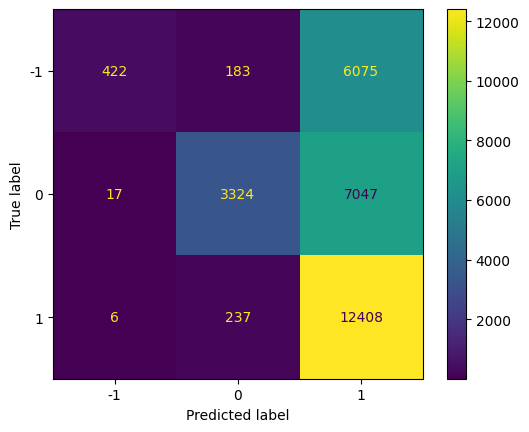

In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_train_pred = cross_val_predict(multinomialNB, x_train, y_train)
plt.rc('font', size=10)

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

## Resources

https://commons.wikimedia.org/wiki/File:Reddit_logo.svg

https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset/data

https://scikit-learn.org/stable/modules/naive_bayes.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python#3.-Types-of-Naive-Bayes-algorithm-

https://github.com/maptv/handson-ml3/blob/main/03_classification.ipynb

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html